In [ ]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as scipyio
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

0/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 154.03864579, DQN Loss 31.8555905819, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 978.060811018, DQN Loss 25.9492022097, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1528.44492781, DQN Loss 6.49635009468, Epsilon 0.0497833343533
Evaluation Result: 1762.19185246


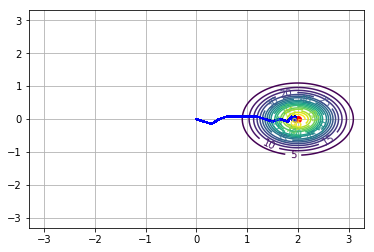

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f66c1498110>> ignored


0/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 163.754162681, DQN Loss 34.3210974932, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 1021.65641691, DQN Loss 20.0162631869, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1523.56659465, DQN Loss 7.71738542616, Epsilon 0.0497833343533
Evaluation Result: 1775.17087333


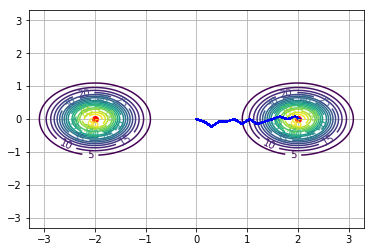

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f666871cf10>> ignored


0/5 Experiment with 2/4 Goals, Start
[1000/3000] Avg Total Reward 194.761845848, DQN Loss 37.845402956, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 1040.16326532, DQN Loss 17.8002778292, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1542.78221598, DQN Loss 5.9593667835, Epsilon 0.0497833343533
Evaluation Result: 1775.90613518


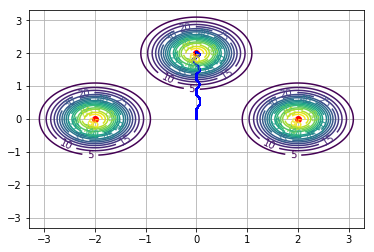

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f666878f990>> ignored


0/5 Experiment with 3/4 Goals, Start
[1000/3000] Avg Total Reward 184.875706363, DQN Loss 39.4445217848, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 993.345080002, DQN Loss 33.3928737044, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1539.43333208, DQN Loss 8.91216316819, Epsilon 0.0497833343533
Evaluation Result: 1765.59964051


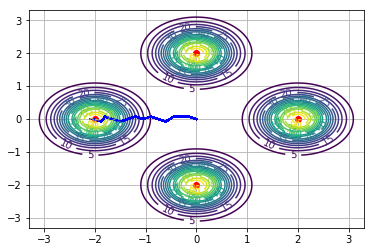

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f66680fa910>> ignored


1/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 162.439493874, DQN Loss 43.2922922373, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 1045.38130366, DQN Loss 27.9491571784, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1524.95944259, DQN Loss 6.70374193788, Epsilon 0.0497833343533
Evaluation Result: 1766.89161594


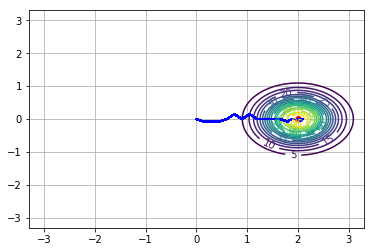

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f66847a69d0>> ignored


1/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 158.505695146, DQN Loss 34.1496553123, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 1020.30884055, DQN Loss 27.7153939009, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1517.26828235, DQN Loss 12.493271336, Epsilon 0.0497833343533
Evaluation Result: 1773.78323188


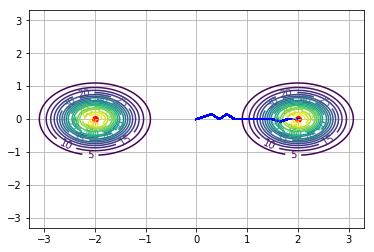

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f667c727ed0>> ignored


1/5 Experiment with 2/4 Goals, Start


In [ ]:

dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]

n_exp = 5
n_goal = 4
n_eval = 500
for i_exp in range(n_exp):
    for i_goal in range(n_goal):
        exp = multi_experiment.Experiments(seed=i_exp,action_res=[5,5],nr_goal=i_goal+1,discount=0.7,
                                           dqn_hidden_spec=dqn_hidden_spec,
                                           max_epi=3000,max_step=20,batch_size=2000,learning_rate=1e-4,
                                           target_update_period=25,replay_memory_size=50000,eps_decay_rate=0.99995,
                                           strategy="Epsilon")
        print("{}/{} Experiment with {}/{} Goals, Start".format(i_exp,n_exp,i_goal,n_goal))

        return_list = exp.run(display_period=1000)
        eval_list, info_list = exp.evaluation(max_eval_epi=n_eval)
        exp.env.plot_paths(info_list)
        plt.draw()
        plt.pause(0.005)
        
        data = {"return_list":return_list,"eval_list":eval_list, "info_list":info_list}        
        data_file_name = "MultiGoal_Epsilon_Goal"+str(i_goal+1)+"Trial"+str(i_exp)+".mat"
        scipyio.savemat(data_file_name, data)

print("{} is finished and is saved".format(data_file_name))